# Titanic Survival Analysis
This notebook explores the Titanic dataset to analyze factors affecting passenger survival rates.

## Step 1: Import Libraries
We will begin by importing the necessary Python libraries for data analysis and visualization.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

## Step 2: Loading the Dataset

We load the Titanic dataset (`train.csv`) and preview the top rows to get an initial sense of the data.

In [47]:
df = pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Step 3: Data Exploration

We examine the shape, structure, summary statistics, and look for any missing values to guide our data cleaning process.


In [48]:
print("Dataset shape:", df.shape)
df.info()
df.describe()
print("Missing values:\n", df.isnull().sum())

Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

## Step 4: Data Cleaning

In this step, we handle missing values and drop columns that won't be needed for our survival analysis.

In [49]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = df.drop(["Ticket", "Cabin", "Name"], axis=1)
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Step 5: Survival Rate by Gender

We compare the survival rates of male and female passengers using a bar plot.


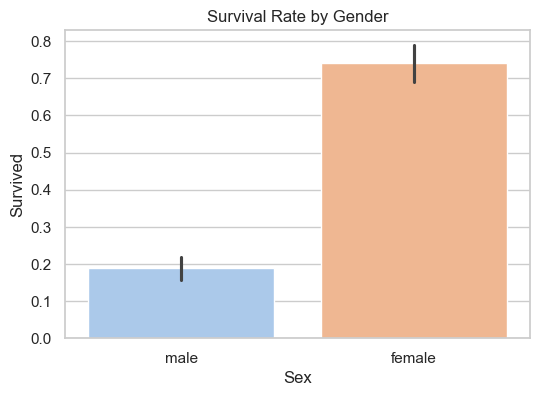

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="pastel", legend=False)
plt.title("Survival Rate by Gender")
plt.show()

**Observation:** Female passengers had a substantially higher survival rate compared to males.

## Step 6: Survival Rate by Passenger Class

This bar plot illustrates the relationship between passenger class and survival rates.

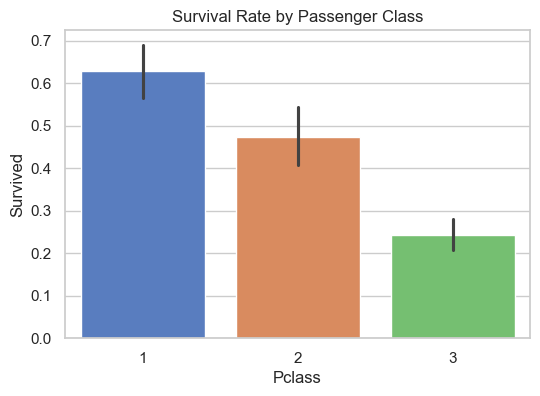

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="muted", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

**Observation:** First-class passengers had the highest chance of survival.

## Step 7: Age Distribution

We plot a histogram to visualize how ages are distributed among the passengers.

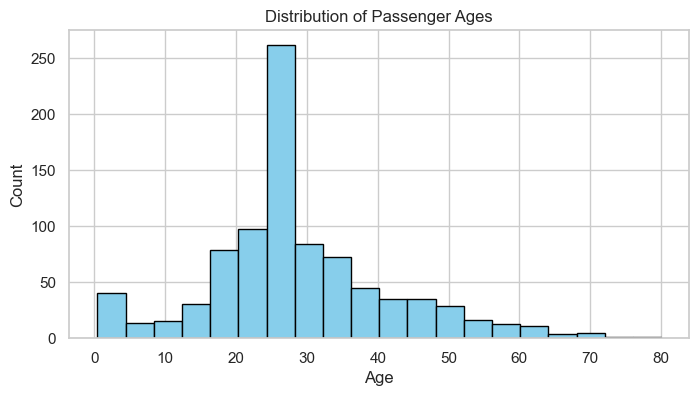

In [56]:
plt.figure(figsize=(8,4))
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Observation:** Most passengers were adults, with fewer children and seniors on board.

## Step 8: Survival Rate by Age Group

Survival rates are compared across different age groups for deeper insights.

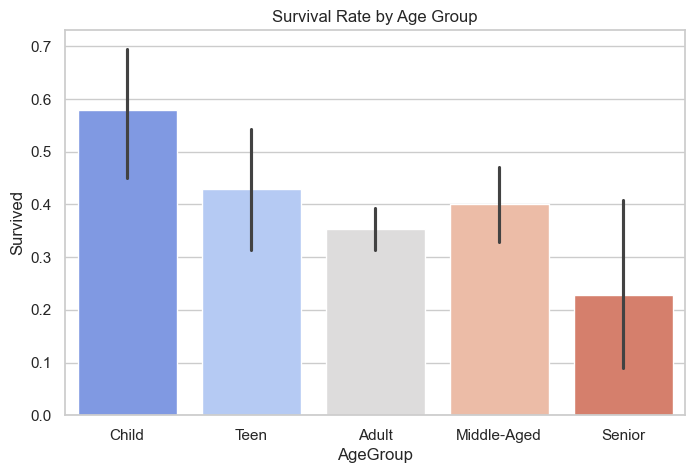

In [57]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0,12,18,35,60,80], labels=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])
plt.figure(figsize=(8,5))
sns.barplot(
    x="AgeGroup",
    y="Survived",
    hue="AgeGroup",  # assign x as hue
    data=df,
    order=["Child", "Teen", "Adult", "Middle-Aged", "Senior"],
    palette="coolwarm",
    legend=False
)
plt.title("Survival Rate by Age Group")
plt.show()

**Observation:** Children had higher survival odds than teens, adults, or seniors.

## Step 9: Feature Correlation Heatmap

This plot helps reveal relationships between numerical features, like fare, age, class, and survival.

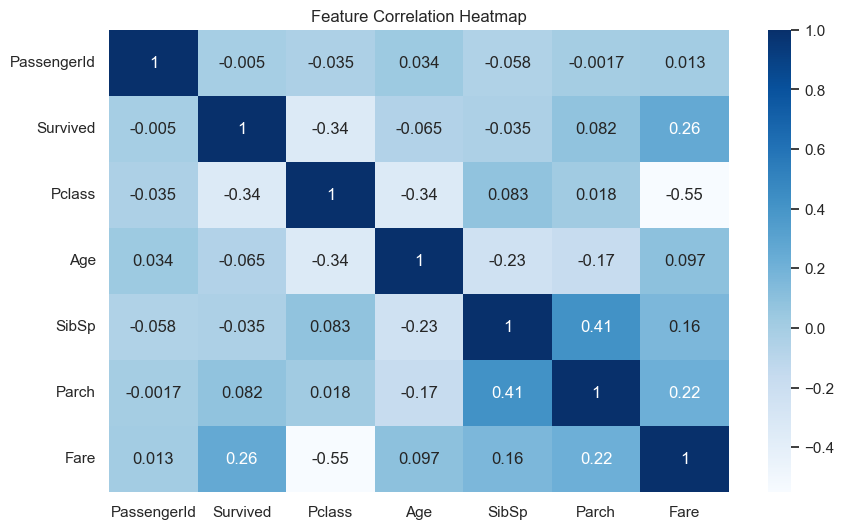

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

**Observation:** Survival correlated positively with fare and class, with subtle ties to other features.

## Summary & Conclusions

- Females and children had the highest survival rates.
- First-class status greatly increased chances of survival.
- Age and fare are important indicators of survival probability.
